# Setup and Context

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [93]:
# %pip install --upgrade plotly

### Import Statements

In [94]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [95]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [96]:
# df_data = pd.read_csv('nobel_prize_data.csv')
df_data = pd.read_csv('/content/drive/MyDrive/Google Collab Projects/Nobel Prize Analysis/nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd.


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration.
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [97]:
df_data.shape

(962, 16)

In [98]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [99]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [100]:
df_data.sort_values(by=['year'])['year'][0]

1901

In [101]:
df_data.sort_values(by=['year'])['year'][961]

2020

**Challange**:
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column?
* Why do these columns have NaN values?

### Check for Duplicates

In [102]:
df_data.duplicated().value_counts()

False    962
dtype: int64

### Check for NaN Values

In [103]:
df_data.isna().values.any()

True

In [104]:
for col in df_data.columns:
  if df_data[col].isna().values.any():
    print(f"The column {col} has NaN values")

The column motivation has NaN values
The column birth_date has NaN values
The column birth_city has NaN values
The column birth_country has NaN values
The column birth_country_current has NaN values
The column sex has NaN values
The column organization_name has NaN values
The column organization_city has NaN values
The column organization_country has NaN values
The column ISO has NaN values


In [105]:
for col in df_data.columns:
  if df_data[col].isna().values.any():
    print(f"The number of NaN values in column {col} is : {df_data[col].isna().value_counts().values[1]}")

The number of NaN values in column motivation is : 88
The number of NaN values in column birth_date is : 28
The number of NaN values in column birth_city is : 31
The number of NaN values in column birth_country is : 28
The number of NaN values in column birth_country_current is : 28
The number of NaN values in column sex is : 28
The number of NaN values in column organization_name is : 255
The number of NaN values in column organization_city is : 255
The number of NaN values in column organization_country is : 254
The number of NaN values in column ISO is : 28


### Type Conversions

**Challenge**:
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [106]:
df_data['birth_date']

0      1852-08-30
1      1839-03-16
2      1854-03-15
3      1822-05-20
4      1828-05-08
          ...    
957    1949-07-02
958           NaN
959    1965-06-16
960    1952-03-24
961    1931-08-08
Name: birth_date, Length: 962, dtype: object

In [107]:
df_data['birth_date']=pd.to_datetime(df_data['birth_date'])
df_data['birth_date']

0     1852-08-30
1     1839-03-16
2     1854-03-15
3     1822-05-20
4     1828-05-08
         ...    
957   1949-07-02
958          NaT
959   1965-06-16
960   1952-03-24
961   1931-08-08
Name: birth_date, Length: 962, dtype: datetime64[ns]

#### Add a Column with the Prize Share as a Percentage

In [108]:
df_data['prize_share'].value_counts()

1/1    352
1/2    321
1/3    219
1/4     70
Name: prize_share, dtype: int64

In [109]:
shares=[]
for share in df_data['prize_share']:
  if share=='1/1':
    shares+=[float(100)]
  elif share=='1/2':
    shares+=[float(50)]
  elif share=='1/3':
    shares+=[float(1/3*100)]
  elif share=='1/4':
    shares+=[float(25)]

df_data['share_pct']=pd.Series(shares)
df_data['share_pct']

0     100.00
1     100.00
2     100.00
3      50.00
4      50.00
       ...  
957    33.33
958   100.00
959    25.00
960    25.00
961    50.00
Name: share_pct, Length: 962, dtype: float64

In [110]:
df_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,100.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,100.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,50.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,33.33
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,25.00
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,25.00


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [111]:
winners_sex=df_data['sex'].value_counts()
df_winners_sex=pd.DataFrame(winners_sex)
df_winners_sex

,sex
Male,876
Female,58


In [112]:
fig=px.pie(labels=df_winners_sex.index, names=df_winners_sex.index, values=df_winners_sex['sex'], hole=0.6)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**:
* What are the names of the first 3 female Nobel laureates?
* What did the win the prize for?
* What do you see in their `birth_country`? Were they part of an organisation?

In [113]:
female_laureates=df_data[df_data['sex']=='Female'].sort_values(by=['year'])
female_laureates.head(3)['full_name']

18                          Marie Curie, née Sklodowska
29    Baroness Bertha Sophie Felicita von Suttner, n...
51                        Selma Ottilia Lovisa Lagerlöf
Name: full_name, dtype: object

In [114]:
female_laureates.head(3)[['full_name','birth_country','organization_name']]

,full_name,birth_country,organization_name
18,"Marie Curie, née Sklodowska",Russian Empire (Poland),NaN
29,"Baroness Bertha Sophie Felicita von Suttner, n...",Austrian Empire (Czech Republic),NaN
51,Selma Ottilia Lovisa Lagerlöf,Sweden,NaN


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they?

In [115]:
is_duplicated=df_data['full_name'].duplicated()
multiple_wins=df_data.loc[is_duplicated.loc[is_duplicated.values==True].index]
multiple_wins['full_name'].drop_duplicates()

62                           Marie Curie, née Sklodowska
215    Comité international de la Croix Rouge (Intern...
340                                   Linus Carl Pauling
424                                         John Bardeen
505                                     Frederick Sanger
523    Office of the United Nations High Commissioner...
Name: full_name, dtype: object

# Number of Prizes per Category

**Challenge**:
* In how many categories are prizes awarded?
* Create a plotly bar chart with the number of prizes awarded by category.
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded?
* Which category has the fewest number of prizes awarded?

In [116]:
categories=df_data['category'].value_counts()
categories

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

In [117]:
fig=px.bar(x=categories.index, y=categories.values,color=categories.values, color_continuous_scale='Aggrnyl', title="Number of Nobel prizes awarded by category")
fig.update_layout(coloraxis_showscale=False, xaxis_title='Categories', yaxis_title='Number of Prizes')
fig.show()

**Challenge**:
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [118]:
econimocs_prizes=df_data[df_data['category']=='Economics'].sort_values(by=['year'])
econimocs_prizes.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,50.00
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,50.00
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,100.00
411,1971,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirically founded interpretation of...",1/1,Individual,Simon Kuznets,1901-04-30,Pinsk,Russian Empire (Belarus),Belarus,Male,Harvard University,"Cambridge, MA",United States of America,BLR,100.00
419,1972,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering contributions to general...",1/2,Individual,John R. Hicks,1904-04-08,Warwick,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,50.00


In [119]:
econimocs_prizes.head(2)[['year', 'full_name']]

,year,full_name
393,1969,Jan Tinbergen
394,1969,Ragnar Frisch


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category.
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [120]:
# First method
categories_by_gender=df_data[['category','sex']].value_counts()
categories_by_gender

category    sex   
Physics     Male      212
Medicine    Male      210
Chemistry   Male      179
Literature  Male      101
Peace       Male       90
Economics   Male       84
Peace       Female     17
Literature  Female     16
Medicine    Female     12
Chemistry   Female      7
Physics     Female      4
Economics   Female      2
dtype: int64

In [121]:
dict={'category': [cat[0]   for cat in categories_by_gender.index],
      'sex': [cat[1]   for cat in categories_by_gender.index],
      'number': categories_by_gender.values}
df=pd.DataFrame(dict)
df

,category,sex,number
0,Physics,Male,212
1,Medicine,Male,210
2,Chemistry,Male,179
3,Literature,Male,101
4,Peace,Male,90
5,Economics,Male,84
6,Peace,Female,17
7,Literature,Female,16
8,Medicine,Female,12
9,Chemistry,Female,7


In [122]:
# Second method
categories_by_gender=df_data.groupby(['category','sex'], as_index=False).count()
categories_by_gender

,category,sex,year,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,organization_name,organization_city,organization_country,ISO,share_pct
0,Chemistry,Female,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
1,Chemistry,Male,179,179,179,179,179,179,179,179,179,179,177,178,179,179,179
2,Economics,Female,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,Economics,Male,84,84,84,84,84,84,84,84,84,84,82,82,82,84,84
4,Literature,Female,16,16,16,16,16,16,16,16,16,16,0,0,0,16,16
5,Literature,Male,101,101,101,101,101,101,101,100,101,101,0,0,0,101,101
6,Medicine,Female,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
7,Medicine,Male,210,210,210,210,210,210,210,209,210,210,209,210,210,210,210
8,Peace,Female,17,17,10,17,17,17,17,17,17,17,0,0,0,17,17
9,Peace,Male,90,90,25,90,90,90,90,89,90,90,4,4,4,90,90


In [123]:
df=categories_by_gender[['category',	'sex',	'prize']]
df.sort_values('prize', ascending=False, inplace=True)
df

<ipython-input-123-e5990cadd61d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [124]:
fig=px.bar(x=df['category'], y=df['prize'],color=df['sex'], color_continuous_scale='Aggrnyl', title="Number of Nobel prizes awarded by category and Gender")
fig.update_layout(coloraxis_showscale=False, xaxis_title='Categories', yaxis_title='Number of Prizes')
fig.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.
* Count the number of prizes awarded every year.
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy).

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`.

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out?
* What could be the reason for the trend in the chart?


In [125]:
number_of_prizes=df_data['year'].value_counts(sort=False)
number_of_prizes

1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: year, Length: 117, dtype: int64

In [126]:
num_prizes_5years=number_of_prizes.rolling(window=5).mean()
num_prizes_5years

1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905    6.20
        ... 
2016   11.60
2017   12.00
2018   12.00
2019   12.20
2020   12.40
Name: year, Length: 117, dtype: float64

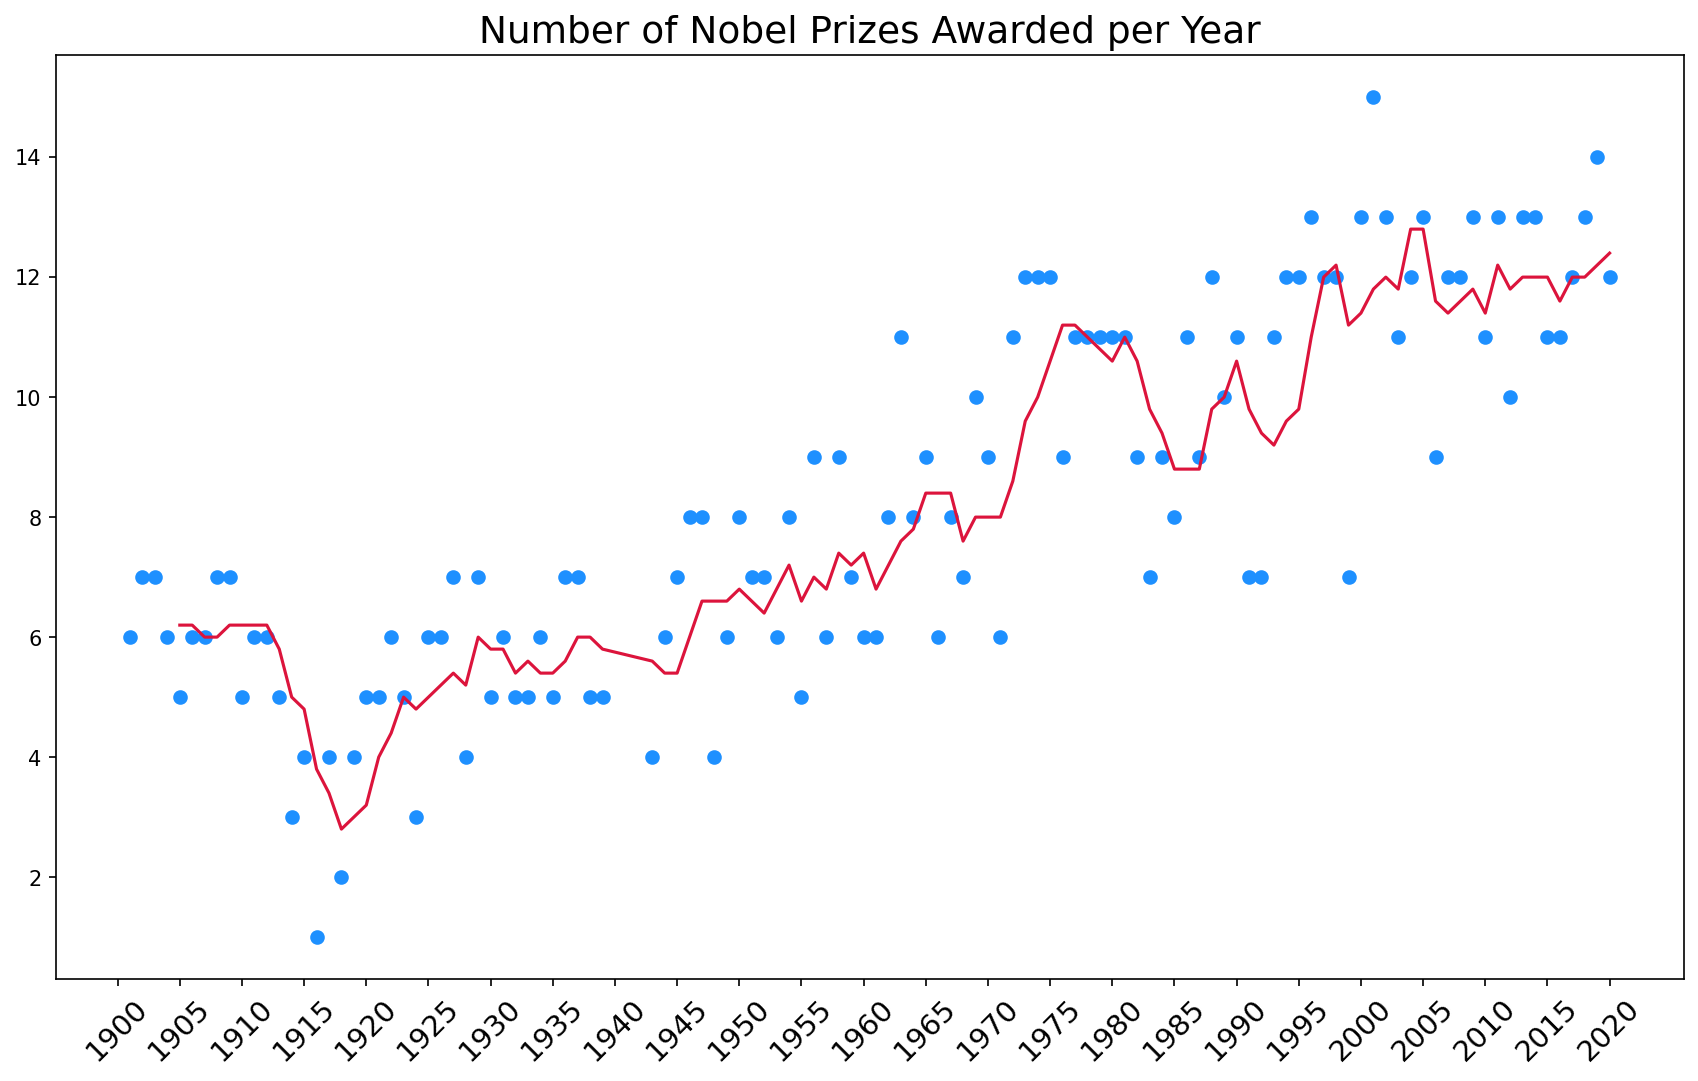

In [127]:

plt.figure(figsize=(14,8), dpi=150)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.scatter(number_of_prizes.index, number_of_prizes.values, color='dodgerblue')
plt.plot(num_prizes_5years.index, num_prizes_5years.values, color='crimson')

five_years=np.arange(1900,2025,5)
plt.xticks(ticks=five_years, fontsize=14, rotation=45)

plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before.

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart.
* See if you can invert the secondary y-axis to make the relationship even more clear.

In [128]:
average_prize_share=df_data.groupby('year').mean()['share_pct']
average_prize_share

<ipython-input-128-83c29c653777>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



year
1901    83.33
1902    71.43
1903    71.43
1904    83.33
1905   100.00
        ...  
2016    54.55
2017    50.00
2018    46.15
2019    42.86
2020    50.00
Name: share_pct, Length: 117, dtype: float64

In [129]:
rolling_average_pr_share=average_prize_share.rolling(window=5).mean()
rolling_average_pr_share

year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905   81.90
        ... 
2016   52.28
2017   50.28
2018   50.28
2019   49.62
2020   48.71
Name: share_pct, Length: 117, dtype: float64

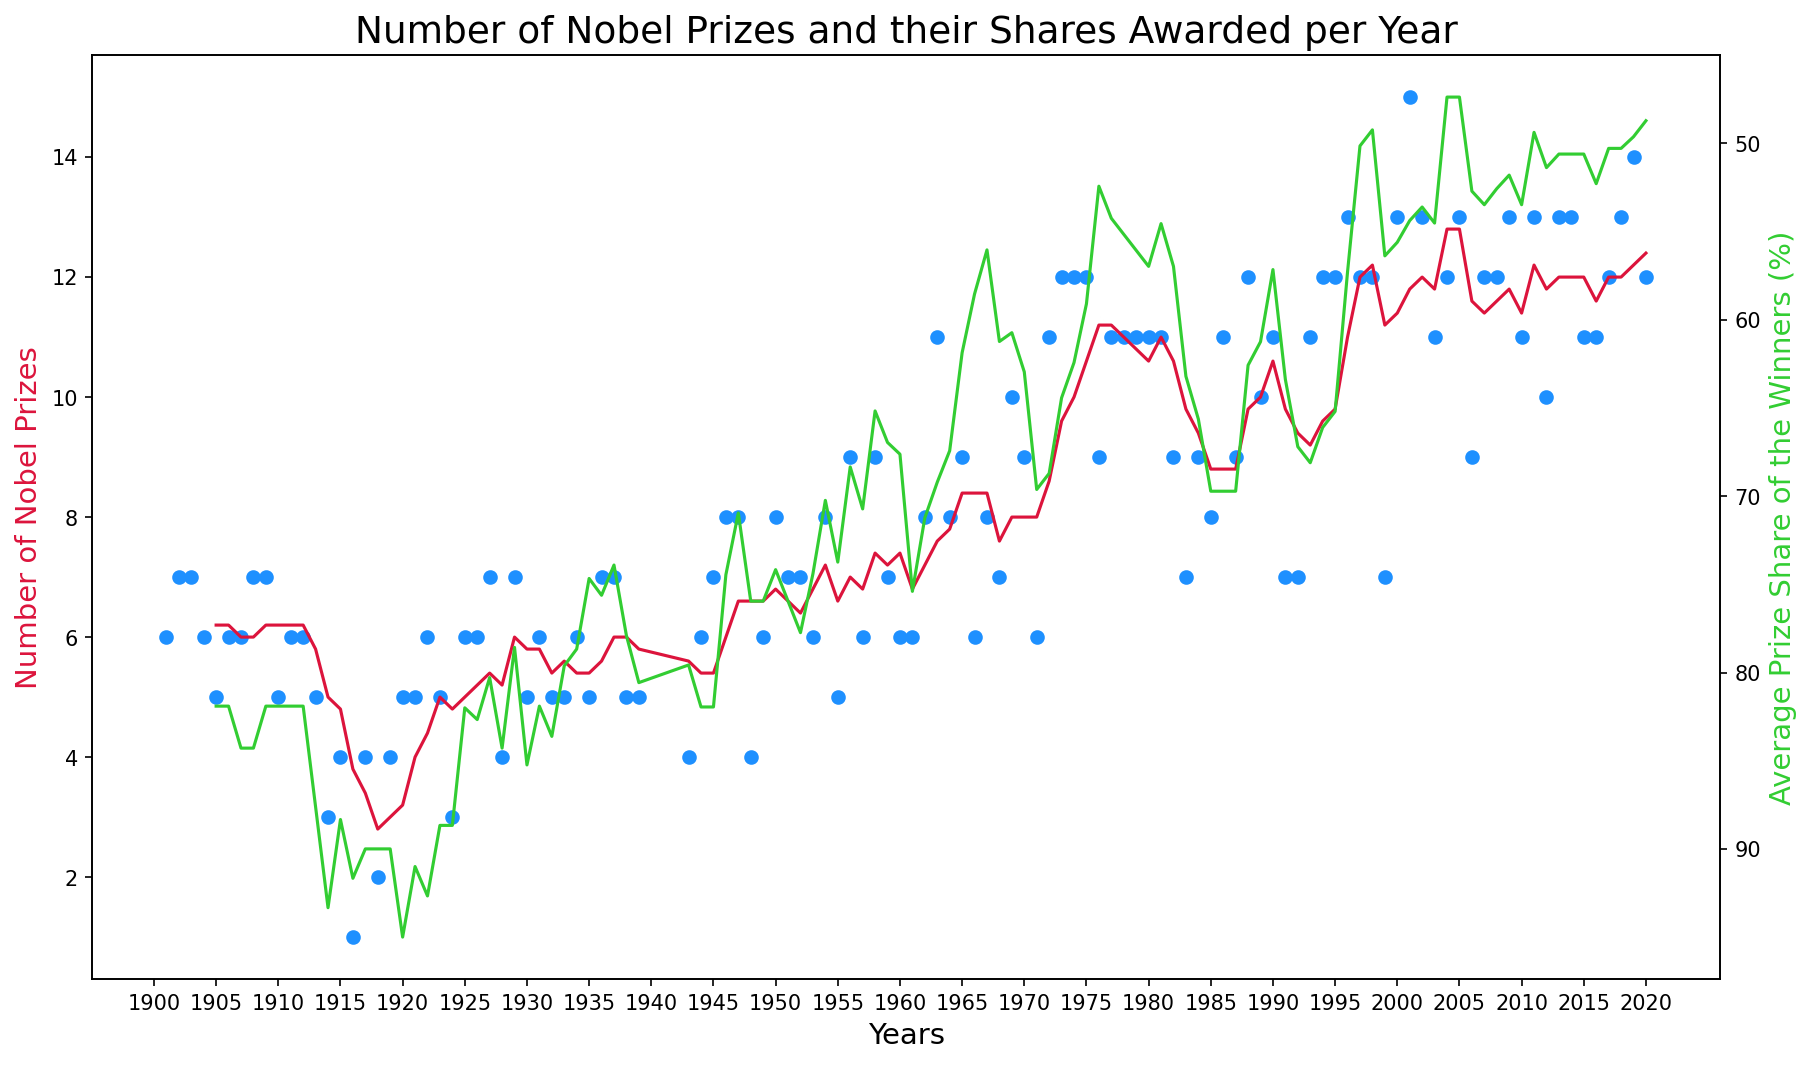

In [130]:
plt.figure(figsize=(14,8), dpi=150)
plt.title('Number of Nobel Prizes and their Shares Awarded per Year', fontsize=18)

ax1=plt.gca()
ax2=ax1.twinx()

ax1.scatter(number_of_prizes.index, number_of_prizes.values, color='dodgerblue')
ax1.plot(num_prizes_5years.index, num_prizes_5years.values, color='crimson')
ax2.plot(rolling_average_pr_share.index, rolling_average_pr_share.values, color='limegreen')

ax1.set_ylabel('Number of Nobel Prizes', color='crimson', fontsize=14)
ax2.set_ylabel('Average Prize Share of the Winners (%)', color='limegreen', fontsize=14)
ax1.set_xlabel('Years', fontsize=14)
ax2.invert_yaxis()


five_years=np.arange(1900,2025,5)
plt.xticks(ticks=five_years, fontsize=14, rotation=45)

plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**:
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won.

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`?
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic?
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [131]:
top_countries =df_data.groupby('birth_country_current', as_index=False).count()
top20_countries=top_countries[['birth_country_current','prize']].sort_values(by=['prize']).tail(20)
top20_countries

,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12
54,Norway,12
13,China,12
51,Netherlands,18
3,Austria,18
39,Italy,19


In [132]:
h_bar=px.bar(x=top20_countries['prize'], y=top20_countries['birth_country_current'], orientation='h',color=top20_countries['prize'], color_continuous_scale='Viridis', title='Top 20 Countries by Number of Prizes')
h_bar.update_layout(coloraxis_showscale=False, yaxis_title='Country', xaxis_title='Number of Prizes')
h_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.

Hint: You'll need to use a 3 letter country code for each country.


In [133]:
top_countries_sorted=top_countries[['birth_country_current','prize']].sort_values(by=['prize'])
top_countries_sorted

,birth_country_current,prize
78,Zimbabwe,1
77,Yemen,1
32,Iceland,1
41,Kenya,1
29,Guadeloupe Island,1
...,...,...
67,Sweden,29
25,France,57
26,Germany,84
73,United Kingdom,105


In [134]:
fig = px.choropleth(top_countries_sorted, locations='birth_country_current',
                    locationmode='country names' , color='prize',
                    color_continuous_scale="matter")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [135]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'],
                               as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
32,Iceland,ISL,1
47,Madagascar,MDG,1
34,Indonesia,IDN,1
36,Iraq,IRQ,1


In [136]:
world_map = px.choropleth(df_countries, locations='ISO', color='prize', hover_name='birth_country_current',
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# In Which Categories are the Different Countries Winning Prizes?

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart!


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [137]:
# First method
top_countries2 =df_data.groupby(['birth_country_current', 'category']).count()
top_countries2

year  prize  motivation  prize_share  \
birth_country_current    category                                           
Algeria                  Literature     1      1           1            1   
                         Physics        1      1           1            1   
Argentina                Medicine       2      2           2            2   
                         Peace          2      2           0            2   
Australia                Chemistry      1      1           1            1   
...                                   ...    ...         ...          ...   
United States of America Physics       70     70          70           70   
Venezuela                Medicine       1      1           1            1   
Vietnam                  Peace          1      1           0            1   
Yemen                    Peace          1      1           1            1   
Zimbabwe                 Peace          1      1           0            1   

                                     laureate_type  full_name  birth_date  \
birth_country_current    category                                           
Algeria                  Literature              1          1           1   
                         Physics                 1          1           1   
Argentina                Medicine                2          2           2   
                         Peace                   2          2           2   
Australia                Chemistry               1          1           1   
...                                            ...        ...         ...   
United States of America Physics                70         70          70   
Venezuela                Medicine                1          1           1   
Vietnam                  Peace                   1          1           1   
Yemen                    Peace                   1          1           1   
Zimbabwe                 Peace                   1          1           1   

                                     birth_city  birth_country  sex  \
birth_country_current    category                                     
Algeria                  Literature           1              1    1   
                         Physics              1              1    1   
Argentina                Medicine             2              2    2   
                         Peace                2              2    2   
Australia                Chemistry            1              1    1   
...                                         ...            ...  ...   
United States of America Physics             70             70   70   
Venezuela                Medicine             1              1    1   
Vietnam                  Peace                1              1    1   
Yemen                    Peace                1              1    1   
Zimbabwe                 Peace                1              1    1   

                                     organization_name  organization_city  \
birth_country_current    category                                           
Algeria                  Literature                  0                  0   
                         Physics                     1                  1   
Argentina                Medicine                    2                  2   
                         Peace                       0                  0   
Australia                Chemistry                   1                  1   
...                                                ...                ...   
United States of America Physics                    70                 68   
Venezuela                Medicine                    1                  1   
Vietnam                  Peace                       0                  0   
Yemen                    Peace                       0                  0   
Zimbabwe                 Peace                       0                  0   

                                     organization_country  ISO  share_pct  
birth_country_current    catego

In [138]:
top_countries2.unstack(level=-1)

year                                      \
category                 Chemistry Economics Literature Medicine Peace   
birth_country_current                                                    
Algeria                        NaN       NaN       1.00      NaN   NaN   
Argentina                      NaN       NaN        NaN     2.00  2.00   
Australia                     1.00       NaN        NaN     7.00   NaN   
Austria                       5.00      1.00       2.00     6.00  1.00   
Azerbaijan                     NaN       NaN        NaN      NaN   NaN   
...                            ...       ...        ...      ...   ...   
United States of America     55.00     49.00      10.00    78.00 19.00   
Venezuela                      NaN       NaN        NaN     1.00   NaN   
Vietnam                        NaN       NaN        NaN      NaN  1.00   
Yemen                          NaN       NaN        NaN      NaN  1.00   
Zimbabwe                       NaN       NaN        NaN      NaN  1.00   

                                     prize                                ...  \
category                 Physics Chemistry Economics Literature Medicine  ...   
birth_country_current                                                     ...   
Algeria                     1.00       NaN       NaN       1.00      NaN  ...   
Argentina                    NaN       NaN       NaN        NaN     2.00  ...   
Australia                   2.00      1.00       NaN        NaN     7.00  ...   
Austria                     3.00      5.00      1.00       2.00     6.00  ...   
Azerbaijan                  1.00       NaN       NaN        NaN      NaN  ...   
...                          ...       ...       ...        ...      ...  ...   
United States of America   70.00     55.00     49.00      10.00    78.00  ...   
Venezuela                    NaN       NaN       NaN        NaN     1.00  ...   
Vietnam                      NaN       NaN       NaN        NaN      NaN  ...   
Yemen                        NaN       NaN       NaN        NaN      NaN  ...   
Zimbabwe                     NaN       NaN       NaN        NaN      NaN  ...   

                                ISO                        share_pct  \
category                 Literature Medicine Peace Physics Chemistry   
birth_country_current                                                  
Algeria                        1.00      NaN   NaN    1.00       NaN   
Argentina                       NaN     2.00  2.00     NaN       NaN   
Australia                       NaN     7.00   NaN    2.00      1.00   
Austria                        2.00     6.00  1.00    3.00      5.00   
Azerbaijan                      NaN      NaN   NaN    1.00       NaN   
...                             ...      ...   ...     ...       ...   
United States of America      10.00    78.00 19.00   70.00     55.00   
Venezuela                       NaN     1.00   NaN     NaN       NaN   
Vietnam                         NaN      NaN  1.00     NaN       NaN   
Yemen                           NaN      NaN  1.00     NaN       NaN   
Zimbabwe                        NaN      NaN  1.00     NaN       NaN   

                                                                      
category                 Economics Literature Medicine Peace Physics  
birth_country_current                                                 
Algeria                        NaN       1.00      NaN   NaN    1.00  
Argentina                      NaN        NaN     2.00  2.00     NaN  
Australia                      NaN        NaN     7.00   NaN    2.00  
Austria                       1.00       2.00     6.00  1.00    3.00  
Azerbaijan                     NaN        NaN      NaN   NaN    1.00  
...                            ...        ...      ...   ...     ...  
United States of America     49.00      10.00    78.00 19.00   70.00  
Venezuela                      NaN        NaN     1.00   NaN     NaN  
Vietnam                        NaN        NaN      NaN  1.00     NaN

In [139]:
top_unstacked=top_countries2.unstack(level=-1)['year'].fillna(0)
top_unstacked['total_prize']=top_unstacked['Chemistry']+top_unstacked['Economics']+top_unstacked['Literature']+top_unstacked['Medicine']+top_unstacked['Peace']+top_unstacked['Physics']
top_unstacked

category,Chemistry,Economics,Literature,Medicine,Peace,Physics,total_prize
birth_country_current,,,,,,,
Algeria,0.00,0.00,1.00,0.00,0.00,1.00,2.00
Argentina,0.00,0.00,0.00,2.00,2.00,0.00,4.00
Australia,1.00,0.00,0.00,7.00,0.00,2.00,10.00
Austria,5.00,1.00,2.00,6.00,1.00,3.00,18.00
Azerbaijan,0.00,0.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...
United States of America,55.00,49.00,10.00,78.00,19.00,70.00,281.00
Venezuela,0.00,0.00,0.00,1.00,0.00,0.00,1.00
Vietnam,0.00,0.00,0.00,0.00,1.00,0.00,1.00


In [140]:
dict0=top_unstacked.stack().to_dict()
dict1={ key:dict0[key] for key in dict0 if dict0[key]!=0}
dict1

{('Algeria', 'Literature'): 1.0,
 ('Algeria', 'Physics'): 1.0,
 ('Algeria', 'total_prize'): 2.0,
 ('Argentina', 'Medicine'): 2.0,
 ('Argentina', 'Peace'): 2.0,
 ('Argentina', 'total_prize'): 4.0,
 ('Australia', 'Chemistry'): 1.0,
 ('Australia', 'Medicine'): 7.0,
 ('Australia', 'Physics'): 2.0,
 ('Australia', 'total_prize'): 10.0,
 ('Austria', 'Chemistry'): 5.0,
 ('Austria', 'Economics'): 1.0,
 ('Austria', 'Literature'): 2.0,
 ('Austria', 'Medicine'): 6.0,
 ('Austria', 'Peace'): 1.0,
 ('Austria', 'Physics'): 3.0,
 ('Austria', 'total_prize'): 18.0,
 ('Azerbaijan', 'Physics'): 1.0,
 ('Azerbaijan', 'total_prize'): 1.0,
 ('Bangladesh', 'Peace'): 1.0,
 ('Bangladesh', 'total_prize'): 1.0,
 ('Belarus', 'Economics'): 1.0,
 ('Belarus', 'Peace'): 2.0,
 ('Belarus', 'Physics'): 1.0,
 ('Belarus', 'total_prize'): 4.0,
 ('Belgium', 'Chemistry'): 1.0,
 ('Belgium', 'Literature'): 1.0,
 ('Belgium', 'Medicine'): 3.0,
 ('Belgium', 'Peace'): 3.0,
 ('Belgium', 'Physics'): 1.0,
 ('Belgium', 'total_prize'): 9.

In [141]:
dict2={}
i=0
for key in dict1:
  country=key[0]
  if key[1]!='total_prize':
    dict2[i]={'country': key[0],
            'category':key[1],
            'cat_prize': dict1[key],
            'total_prize': dict1[( key[0],'total_prize')]
            }
    i+=1
dict2



{0: {'country': 'Algeria',
  'category': 'Literature',
  'cat_prize': 1.0,
  'total_prize': 2.0},
 1: {'country': 'Algeria',
  'category': 'Physics',
  'cat_prize': 1.0,
  'total_prize': 2.0},
 2: {'country': 'Argentina',
  'category': 'Medicine',
  'cat_prize': 2.0,
  'total_prize': 4.0},
 3: {'country': 'Argentina',
  'category': 'Peace',
  'cat_prize': 2.0,
  'total_prize': 4.0},
 4: {'country': 'Australia',
  'category': 'Chemistry',
  'cat_prize': 1.0,
  'total_prize': 10.0},
 5: {'country': 'Australia',
  'category': 'Medicine',
  'cat_prize': 7.0,
  'total_prize': 10.0},
 6: {'country': 'Australia',
  'category': 'Physics',
  'cat_prize': 2.0,
  'total_prize': 10.0},
 7: {'country': 'Austria',
  'category': 'Chemistry',
  'cat_prize': 5.0,
  'total_prize': 18.0},
 8: {'country': 'Austria',
  'category': 'Economics',
  'cat_prize': 1.0,
  'total_prize': 18.0},
 9: {'country': 'Austria',
  'category': 'Literature',
  'cat_prize': 2.0,
  'total_prize': 18.0},
 10: {'country': 'Aust

In [142]:
country_cat=pd.DataFrame(dict2)
country_cat

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
country,Algeria,Algeria,Argentina,Argentina,Australia,Australia,Australia,Austria,Austria,Austria,...,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,Venezuela,Vietnam,Yemen,Zimbabwe
category,Literature,Physics,Medicine,Peace,Chemistry,Medicine,Physics,Chemistry,Economics,Literature,...,Chemistry,Economics,Literature,Medicine,Peace,Physics,Medicine,Peace,Peace,Peace
cat_prize,1.00,1.00,2.00,2.00,1.00,7.00,2.00,5.00,1.00,2.00,...,55.00,49.00,10.00,78.00,19.00,70.00,1.00,1.00,1.00,1.00
total_prize,2.00,2.00,4.00,4.00,10.00,10.00,10.00,18.00,18.00,18.00,...,281.00,281.00,281.00,281.00,281.00,281.00,1.00,1.00,1.00,1.00


In [143]:
############ Transpose of the dataframe
country_cat=pd.DataFrame(dict2).T
top_country_cat=country_cat.sort_values('total_prize').tail(114)
top_country_cat

,country,category,cat_prize,total_prize
89,India,Economics,2.00,9.00
171,South Africa,Chemistry,1.00,9.00
21,Belgium,Peace,3.00,9.00
172,South Africa,Literature,2.00,9.00
173,South Africa,Medicine,3.00,9.00
...,...,...,...,...
203,United States of America,Literature,10.00,281.00
204,United States of America,Medicine,78.00,281.00
205,United States of America,Peace,19.00,281.00
206,United States of America,Physics,70.00,281.00


In [144]:
h_bar=px.bar(top_country_cat, x='cat_prize', y='country', color='category', orientation='h',title='Top 20 Countries by Number of Prizes')
h_bar.update_layout( yaxis_title='Country', xaxis_title='Number of Prizes')
h_bar.update_yaxes(categoryorder='total ascending')

h_bar.show()

In [145]:
# Second method
top_countries =df_data.groupby('birth_country_current', as_index=False).count()
top20_countries=top_countries[['birth_country_current','prize']].sort_values(by=['prize']).tail(20)
top20_countries

,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12
54,Norway,12
13,China,12
51,Netherlands,18
3,Austria,18
39,Italy,19


In [146]:
cat_country = df_data.groupby(['birth_country_current', 'category'],
                               as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)
cat_country

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


In [147]:
merged_df = pd.merge(cat_country, top20_countries, on='birth_country_current')
# change column names
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
merged_df.sort_values(by='total_prize', inplace=True)
merged_df

,birth_country_current,category,cat_prize,total_prize
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


In [148]:
cat_cntry_bar = px.bar(x=merged_df.cat_prize, y=merged_df.birth_country_current, color=merged_df.category,
                       orientation='h', title='Top 20 Countries by Number of Prizes and Category')

cat_cntry_bar.update_layout(xaxis_title='Number of Prizes', yaxis_title='Country')
cat_cntry_bar.show()

In [149]:
# Third Method:
top_countries2 =df_data.groupby(['birth_country_current', 'category']).count()
top_unstacked=top_countries2.unstack(level=-1)['year'].fillna(0)
top_unstacked['total_prize']=top_unstacked['Chemistry']+top_unstacked['Economics']+top_unstacked['Literature']+top_unstacked['Medicine']+top_unstacked['Peace']+top_unstacked['Physics']
top_country_cat=top_unstacked.sort_values('total_prize', ascending=False).head(19)
top_country_cat


category,Chemistry,Economics,Literature,Medicine,Peace,Physics,total_prize
birth_country_current,,,,,,,
United States of America,55.00,49.00,10.00,78.00,19.00,70.00,281.00
United Kingdom,27.00,8.00,7.00,28.00,11.00,24.00,105.00
Germany,26.00,1.00,8.00,18.00,5.00,26.00,84.00
France,10.00,4.00,11.00,12.00,10.00,10.00,57.00
Sweden,4.00,2.00,7.00,7.00,5.00,4.00,29.00
Japan,7.00,0.00,3.00,5.00,1.00,11.00,27.00
Poland,4.00,1.00,6.00,6.00,2.00,8.00,27.00
Russia,4.00,3.00,5.00,2.00,2.00,10.00,26.00
Canada,4.00,3.00,2.00,4.00,1.00,6.00,20.00


In [150]:
h_bar=px.bar(top_country_cat, x=['Chemistry', 'Economics',	'Literature',	'Medicine',	'Peace',	'Physics'],
             y=top_country_cat.index, orientation='h', title='Top 20 Countries by Number of Prizes')
h_bar.update_layout( yaxis_title='Country', xaxis_title='Number of Prizes')
h_bar.update_yaxes(categoryorder='total ascending')
h_bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won?
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this.
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line.

In [151]:
prizes_over_time =df_data.groupby(['year','birth_country_current' ], as_index=False).count()[['year','birth_country_current','prize']]
prizes_over_time

,year,birth_country_current,prize
0,1901,France,2
1,1901,Germany,1
2,1901,Netherlands,1
3,1901,Poland,1
4,1901,Switzerland,1
...,...,...,...
622,2019,United States of America,3
623,2020,France,1
624,2020,Germany,1
625,2020,United Kingdom,2


In [152]:
prizes_over_time.groupby(['birth_country_current']).cumsum()

,year,prize
0,1901,2
1,1901,1
2,1901,1
3,1901,1
4,1901,1
...,...,...
622,173472,274
623,80181,57
624,123165,84
625,131796,105


In [153]:
prizes_over_time['prizes_cumul']=prizes_over_time[['birth_country_current',	'prize']].groupby(['birth_country_current']).cumsum()
prizes_over_time

,year,birth_country_current,prize,prizes_cumul
0,1901,France,2,2
1,1901,Germany,1,1
2,1901,Netherlands,1,1
3,1901,Poland,1,1
4,1901,Switzerland,1,1
...,...,...,...,...
622,2019,United States of America,3,274
623,2020,France,1,57
624,2020,Germany,1,84
625,2020,United Kingdom,2,105


In [154]:
line_chart=px.line(prizes_over_time, x='year', y='prizes_cumul', color='birth_country_current',
                   title="Cumulative Number of Prizes By Countries")
line_chart.update_layout( xaxis_title='Years', yaxis_title='Number of Prizes')
line_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [155]:
organizations=df_data.groupby('organization_name').count()['prize'].sort_values().tail(20)
organizations

organization_name
Institut Pasteur                                 7
London University                                7
Harvard Medical School                           7
University College London                        7
Cornell University                               8
Bell Laboratories                                8
Yale University                                  9
MRC Laboratory of Molecular Biology             10
University of Oxford                            12
Rockefeller University                          13
Max-Planck-Institut                             13
Princeton University                            15
Columbia University                             17
California Institute of Technology (Caltech)    17
University of Cambridge                         18
University of Chicago                           20
Massachusetts Institute of Technology (MIT)     21
Stanford University                             23
Harvard University                              29
University of

In [156]:
h_bar=px.bar(y=organizations.index, x=organizations.values, orientation='h',color=organizations.values, color_continuous_scale='Viridis', title='Top 20 Research Institutions by Number of Prizes')
h_bar.update_layout(coloraxis_showscale=False, yaxis_title='Intitutions', xaxis_title='Number of Prizes')
h_bar.show()

# Which Cities Make the Most Discoveries?

Where do major discoveries take place?

**Challenge**:
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [157]:
organizations_cities=df_data.groupby('organization_city').count()['prize'].sort_values().tail(20)
organizations_cities

organization_city
Göttingen         8
Zurich            8
Heidelberg        9
New Haven, CT     9
Munich            9
Boston, MA        9
Moscow           10
Stockholm        10
Oxford           12
Berlin           12
Pasadena, CA     17
Princeton, NJ    19
Chicago, IL      20
Berkeley, CA     21
Stanford, CA     24
Paris            25
London           27
Cambridge        31
New York, NY     45
Cambridge, MA    50
Name: prize, dtype: int64

In [158]:
h_bar=px.bar(y=organizations_cities.index, x=organizations_cities.values, orientation='h',color=organizations_cities.values, color_continuous_scale='Viridis', title='Top 20 Research Institutions Cities by Number of Prizes')
h_bar.update_layout(coloraxis_showscale=False, yaxis_title='Cities', xaxis_title='Number of Prizes')
h_bar.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities

**Challenge**:
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates.
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York?
* How many Nobel laureates were born in London, Paris and Vienna?
* Out of the top 5 cities, how many are in the United States?


In [159]:
birth_cities=df_data.groupby('birth_city').count()['prize'].sort_values().tail(20)
birth_cities

birth_city
Milwaukee, WI             3
Cairo                     4
Montreal                  4
Pittsburgh, PA            4
Frankfurt-on-the-Main     5
Prague                    5
Stockholm                 6
Hamburg                   6
Munich                    7
Moscow                    7
Washington, DC            8
Boston, MA                8
Brooklyn, NY              8
Budapest                  8
Berlin                   11
Chicago, IL              12
Vienna                   14
London                   19
Paris                    26
New York, NY             53
Name: prize, dtype: int64

In [160]:
birth_cities_bar=px.bar(y=birth_cities.index, x=birth_cities.values, orientation='h',color=birth_cities.values, color_continuous_scale='Plasma', title='Top 20  birth cities of Nobel laureates')
birth_cities_bar.update_layout(coloraxis_showscale=False, yaxis_title='Cities', xaxis_title='Number of Prizes')
birth_cities_bar.show()

In [161]:
53/281*100

18.86120996441281

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**:

* Create a DataFrame that groups the number of prizes by organisation.
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France?


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [162]:
all_organizations=df_data.groupby(by=['organization_name', 'organization_city', 'organization_country'], as_index=False).count()[['organization_name', 'organization_city', 'organization_country', 'prize']].sort_values('prize')
all_organizations

,organization_name,organization_city,organization_country,prize
0,A.F. Ioffe Physico-Technical Institute,St. Petersburg,Russia,1
155,Nordita,Copenhagen,Denmark,1
159,Parker Institute for Cancer Immunotherapy,"San Francisco, CA",United States of America,1
160,Pavia University,Pavia,Italy,1
161,Polarographic Institute of the Czechoslovak Ac...,Prague,Czech Republic,1
...,...,...,...,...
215,University of California,"Berkeley, CA",United States of America,19
222,University of Chicago,"Chicago, IL",United States of America,20
121,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,21
185,Stanford University,"Stanford, CA",United States of America,23


In [163]:
sunburst_fig=px.sunburst(all_organizations,path=['organization_country','organization_city',
                                                 'organization_name'], values='prize')
sunburst_fig.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you.



In [164]:
df_data['winning_age']=df_data['year']-pd.DatetimeIndex(df_data['birth_date']).year
df_data['winning_age']

0     49.00
1     62.00
2     47.00
3     79.00
4     73.00
       ... 
957   71.00
958     NaN
959   55.00
960   68.00
961   89.00
Name: winning_age, Length: 962, dtype: float64

### Who were the oldest and youngest winners?

**Challenge**:
* What are the names of the youngest and oldest Nobel laureate?
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [165]:
df_data.sort_values('winning_age').head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,50.00,17.00


In [166]:
df_data.sort_values('winning_age', ascending=False).head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,33.33,97.00


In [167]:
df_data['winning_age'].mean()

59.94860813704497

In [168]:
df_data['winning_age'].describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award.
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.

In [169]:
df_age=df_data[['year','winning_age']].dropna().sort_values('winning_age')
df_age

,year,winning_age
885,2014,17.00
85,1915,25.00
932,2018,25.00
305,1957,31.00
171,1933,31.00
...,...,...
961,2020,89.00
856,2012,89.00
794,2007,90.00
933,2018,96.00


In [170]:
df_data['winning_age'].describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

<Axes: xlabel='winning_age', ylabel='Count'>

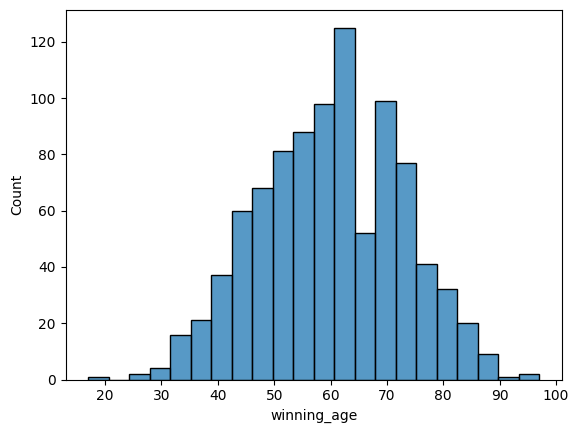

In [171]:
sns.histplot(df_age, x='winning_age')

<Axes: xlabel='winning_age', ylabel='Count'>

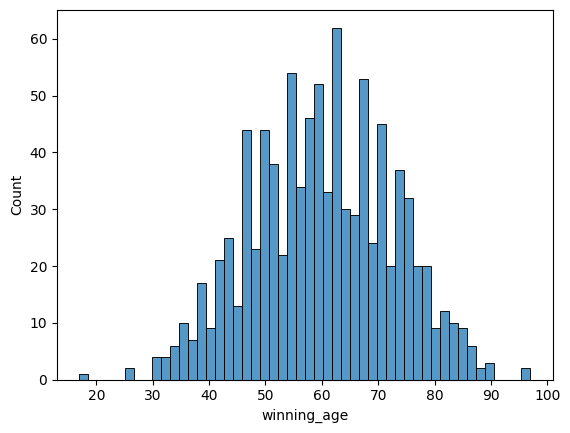

In [172]:
sns.histplot(df_age, x='winning_age', bins=50)

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


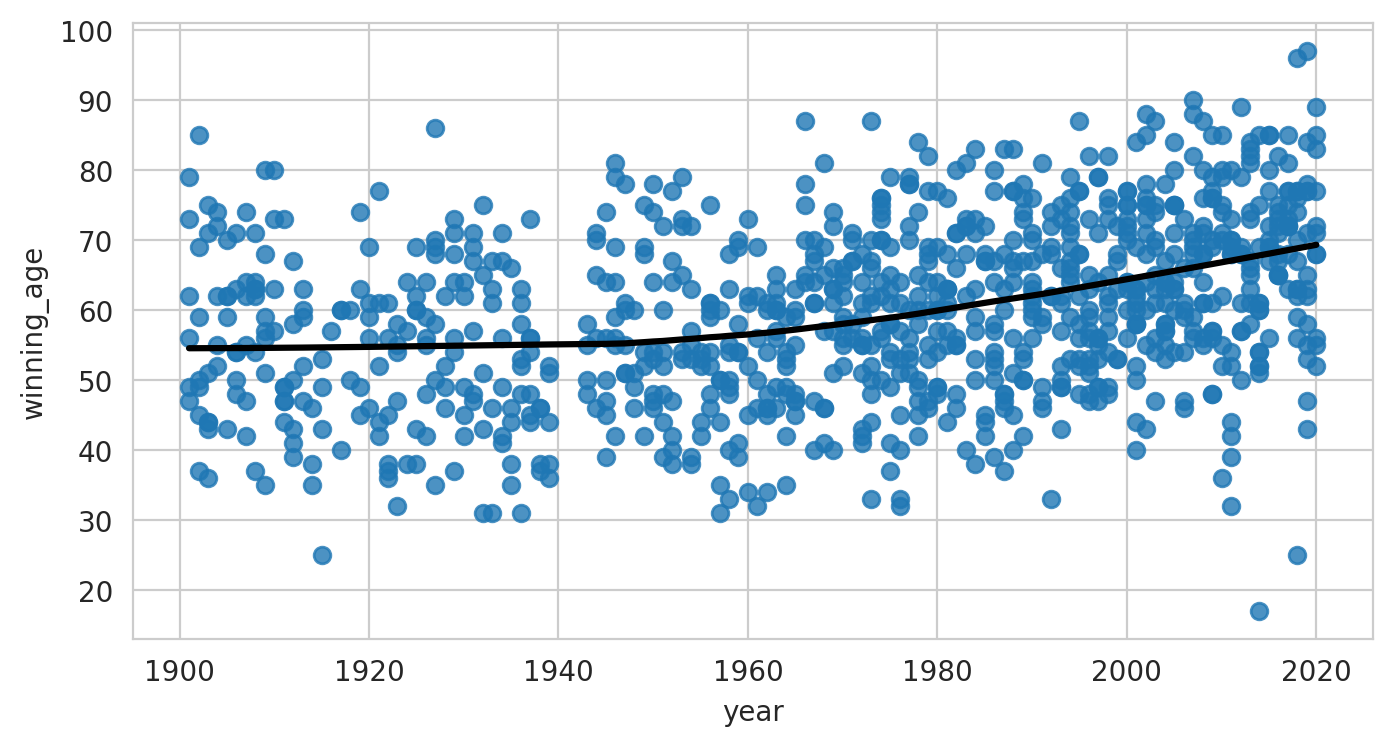

In [173]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.regplot(df_age, x='year', y='winning_age', line_kws={'color':'black'}, lowess=True)


### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

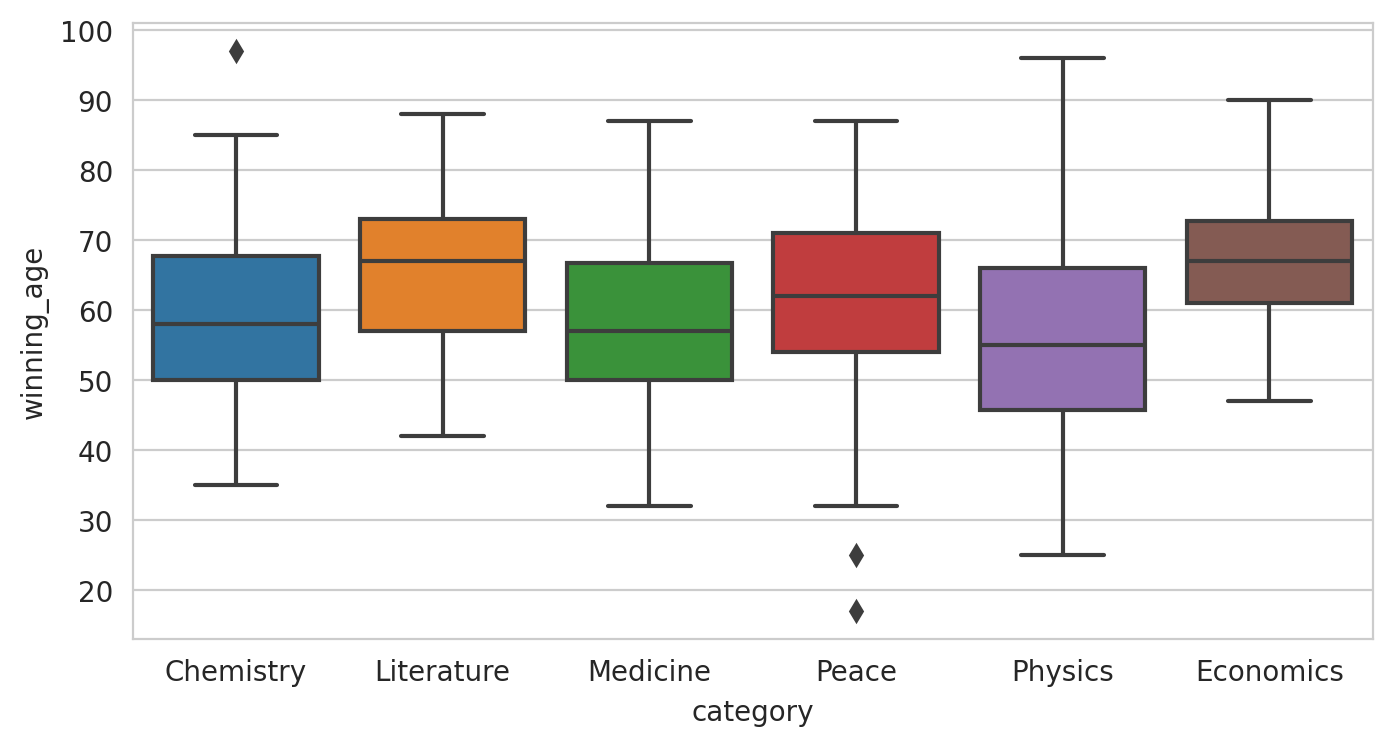

In [174]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.boxplot(df_data, y='winning_age', x='category')

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter.


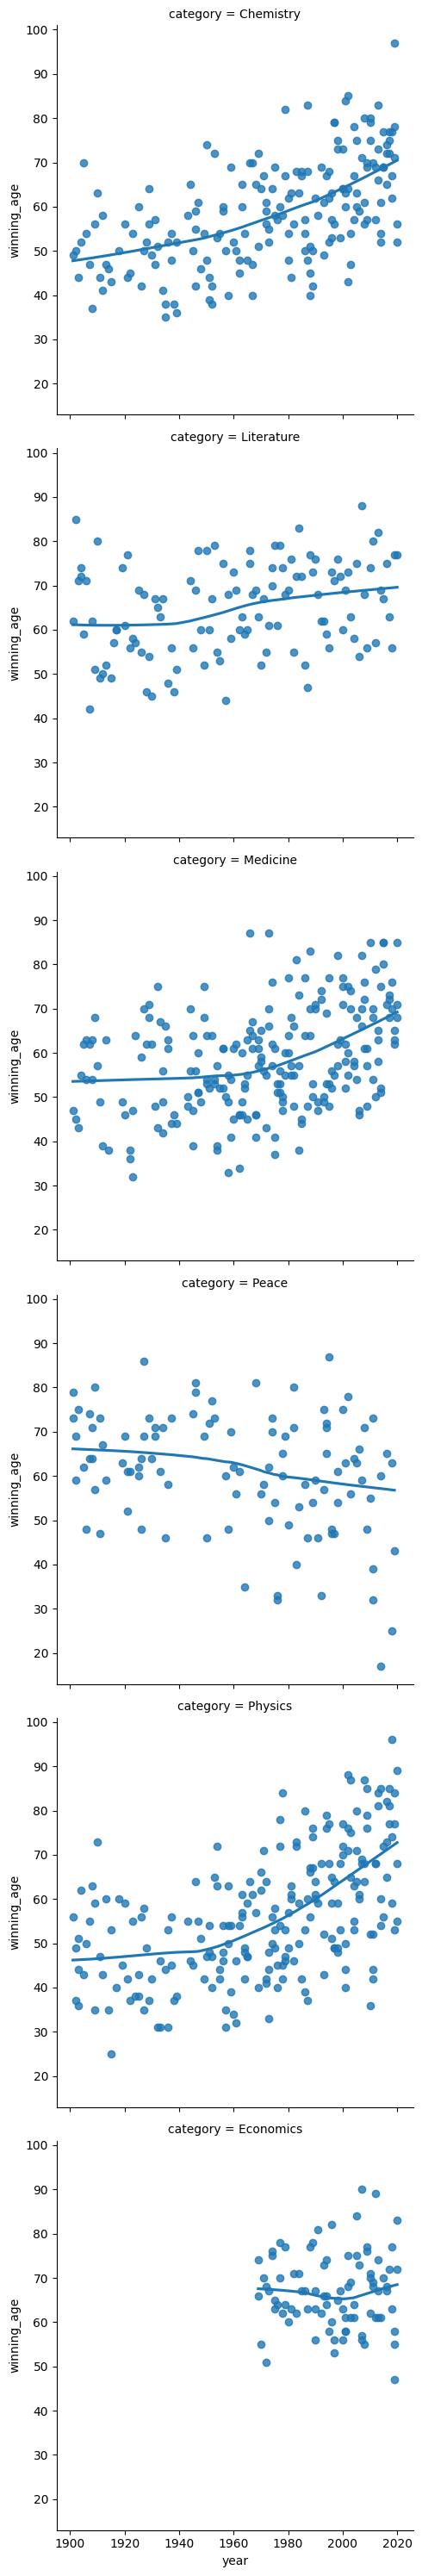

In [175]:
sns.lmplot(df_data, x='year', y='winning_age',row='category', lowess=True)


<Figure size 4000x3000 with 0 Axes>

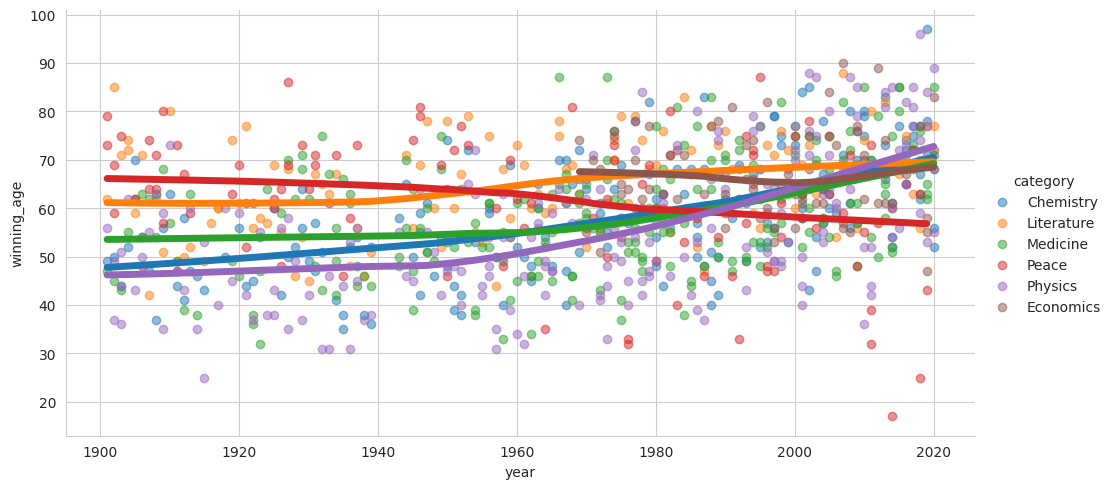

In [181]:
plt.figure(figsize=(20,15), dpi=200)
with sns.axes_style('whitegrid'):
  sns.lmplot(df_data, x='year', y='winning_age',hue='category', lowess=True, aspect=2,
             scatter_kws={'alpha': 0.5}, line_kws={'linewidth': 5})
